In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 100

import numpy as np

import focusmodel

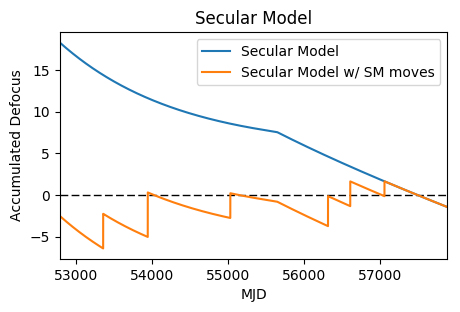

In [3]:
t2003 = focusmodel.to_julian(2003,6,1)
tpresent = focusmodel.to_julian(2017,5,10)
times = np.linspace(t2003 ,tpresent, num=10000)

secular = focusmodel.fullmodel(times, model_type = 'secular', add_sm_steps = False)
secular_with_steps = focusmodel.fullmodel(times, model_type = 'secular', add_sm_steps = True)

fig, ax = plt.subplots(1, 1, figsize = (5, 3))
ax.plot(times, secular, label = 'Secular Model')
ax.plot(times, secular_with_steps, label = 'Secular Model w/ SM moves')

ax.hlines(0, times[0], times[-1], linestyles='--', lw=1.)
ax.set_xlim(times[0], times[-1])

ax.legend()
ax.set_xlabel('MJD')
ax.set_ylabel('Accumulated Defocus')
ax.set_title('Secular Model')

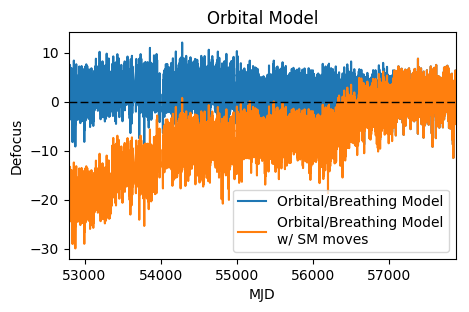

In [5]:
orbital = focusmodel.fullmodel(times, model_type = 'orbital', add_sm_steps = False, thermal_path = '.')
orbital_with_steps = focusmodel.fullmodel(times, model_type = 'orbital', add_sm_steps = True, thermal_path = '.')

fig, ax = plt.subplots(1, 1, figsize = (5, 3))
ax.plot(times, orbital, label = 'Orbital/Breathing Model')
ax.plot(times, orbital_with_steps, label = 'Orbital/Breathing Model\nw/ SM moves')

ax.hlines(0, times[0], times[-1], linestyles='--', lw = 1., zorder = 10)
ax.set_xlim(times[0], times[-1])

ax.legend()
ax.set_xlabel('MJD')
ax.set_ylabel('Defocus')
ax.set_title('Orbital Model')

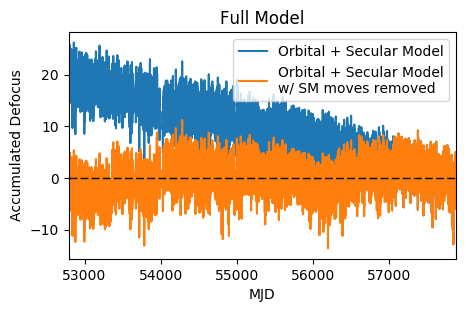

In [6]:
full = focusmodel.fullmodel(times, model_type = 'full', add_sm_steps = False, thermal_path = '.')
full_with_steps = focusmodel.fullmodel(times, model_type = 'full', add_sm_steps = True, thermal_path = '.')

fig, ax = plt.subplots(1, 1, figsize = (5, 3))
ax.plot(times, full, label = 'Orbital + Secular Model')
ax.plot(times, full_with_steps, label = 'Orbital + Secular Model\nw/ SM moves removed')

ax.hlines(0, times[0], times[-1], linestyles='--', lw = 1., zorder = 10)
ax.set_xlim(times[0], times[-1])

ax.legend()
ax.set_xlabel('MJD')
ax.set_ylabel('Accumulated Defocus')
ax.set_title('Full Model')